<font color='green'> 
**Kodluyoruz - Data Science for Public Good (28.03.2020-20.06.2020)**
7. hafta - Decorators - 10.05.2020 tarihinde Engin Deniz Alpman anlattı. 
</font>

# Decorators

## 1)First Class Functions

<font color='blue'>Bir programlama dilinin first class functionları destekliyor olması şu anlama geliyor: Bir fonksiyona başka bir fonksiyonu parametre olarak verebiliyorsun ve fonksiyonlar return olarak fonksiyon döndürebiliyorlar. </font>

When programming language has(support) first class functions, it means passing functions as arguments to other functions and returning them as an output, and storing them in a variable (that does not have to be all together, we can have specific ones, pairs or all of them in our code)

In [1]:
def double(x):
    
    return x ** 2

In [2]:
f = double(3)

In [3]:
print(f)

9


<font color='blue'>Fonksiyonları variable olarak bir şeye eşitleyebiliyorduk. Ondan sonra onu çağırabiliyorduk.  </font>

In [4]:
f = double 

In [5]:
print(f)

<function double at 0x000001A656DB1CA8>


In [6]:
print(f(3))

9


If we pass functions as an parameters to other function or return functions as a result, those functions (ones that accepts or returns functions) are called **higher order functions** 

### Functions as an Parameters

<font color='blue'>Diyelim ki bir listem var, bu listenin bütün elemanlarına tek tek fonksiyonumu uygulamak istiyorum.  </font>

In [14]:
def apply(l, func): # fonksiyonu bir parametre olarak aldı
    for i in range(len(l)):
        l[i] = func(l[i])
        
    return l

In [15]:
def square(x):
    return x * x 

In [16]:
l = [1, 2, 3, 4]

In [17]:
apply(l, square)

[1, 4, 9, 16]

In [18]:
l

[1, 4, 9, 16]

list is changed

In [20]:
# to avoid this
def apply(l, func):
    res = []
    for e in l: 
        res.append(func(e))
        
    return res

In [21]:
l = [1, 2, 3, 4]

In [22]:
apply(l, square)

[1, 4, 9, 16]

In [23]:
l

[1, 2, 3, 4]

<font color='blue'>Fonksiyonu parametre olarak verdiğim için apply() higher order function oluyor. </font>

Apply() is a **higher order function**

we are adding **()** when we want to execute the function so we do not write like: **apply(l, func())**

What is good about apply function is that we can change the function that we want to apply and we can reuse apply in that case too

<font color='blue'>Apply herhangi bir fonksiyonu listeye uygulayabildiği için square yerine başka bir fonksiyon da tanımlasak onu da listemize uygulayabilmiş olacak.   </font>

In [29]:
def cube(x):
    return x**3

In [30]:
l

[1, 2, 3, 4]

In [31]:
apply(l, cube)

[1, 8, 27, 64]

### Returning Functions

<font color='blue'>Fonksiyon da return edebilir. </font>

In [31]:
def message(txt):
    
    def msg():
        print("Message:", txt)
        
    return msg # fonksiyon return ediyor.

In [32]:
msg_hi = message("hi")

In [33]:
msg_hi

<function __main__.message.<locals>.msg()>

<font color='blue'>Değerini görebilmem için yeniden execute etmem lazım.  </font>

In [35]:
msg_hi()

Message: hi


it remembered the txt we passed to outer function

##### <font color='blue'>`return msg` yerine `return msg()` yapsaydık direkt message("hi") çalıştırdığımızda bir değer döndürecekti. </font>

In [45]:
def message(txt):
    
    def msg():
        print("Message:", txt)
        
    return msg()

In [46]:
msg_hi = message("hi")

Message: hi


In [47]:
msg_hi # print yaptırdığımız için herhangi bir şey dönmüyor.

In [53]:
msg_hi() # hata verir, zaten function call yapmışız.

TypeError: 'NoneType' object is not callable

In [59]:
print(msg_hi)

None


##### <font color='blue'>`msg_hi` hiçbir şey return etmediği için sadece print yaptığı için bir değer döndürmemişti bize, return olarak değiştirip tekrar deniyoruz.</font>

In [55]:
def message2(txt):
    
    def msg():
        return txt
        
    return msg()

In [56]:
msg_hello = message2("hello")

In [57]:
msg_hello

'hello'

In [58]:
print(msg_hello)

hello


## 2) Closures

<font color='blue'>İçiçe fonksiyonlarda dıştaki fonksiyonun içeriye erişimi yoktu. Ama en içtekinin dıştakilere erişimi vardı.</font>

Enable inner function to access outer function's scope even after we assigned or call outer function

##### <font color='blue'>outer() fonksiyonunda inner() fonksiyonunu `inner()` olarak döndürmek istediğimizde:</font>

In [32]:
def outer():
    msg = "Hey"
    
    def inner():
        print(msg)
        
    return inner()

In [33]:
outer() # çağırdığım gibi inner'ı execute ediyor.

Hey


We saw above example while we were looking at function scopes

<font color='blue'>`outer()` ile outer'ı execute etmek istediğimizde önce girecek `msg="hey"` kodunu okuyacak. Sonra inner'ı execute edecek. inner'a girdiğinde `print(msg)`yi görecek. 'msg' neydi bakmak için bir dış scope'a dönecek oradan `msg = "hey"` bilgisini alacak ve "hey"i bastıracak.</font>

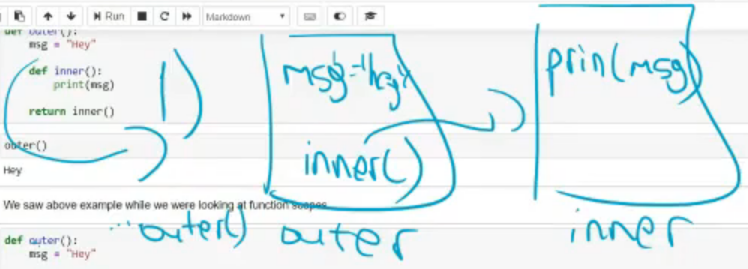

<font color='blue'>Burada inner() function var içeride ve onu return ettim gibi düşünebilirsiniz ama `msg = "Hey"`i de hatırlıyor bu. Yani `outer()` functionı bir kere çağırdıktan sonra bile `inner()`ın ona erişimi devam ediyor. Bu da decoratorların çalışmasını sağlayan durum.  </font>

##### <font color='blue'>outer() fonksiyonunda inner() fonksiyonunu `inner` olarak döndürmek istediğimizde: </font>

In [63]:
def outer():
    msg = "Hey"
    
    def inner():
        print(msg)
        
    return inner

In [64]:
f = outer()  # f dediğim şey artık inner fonksiyonu olacak. f = inner

In [65]:
f

<function __main__.outer.<locals>.inner()>

In [66]:
f()  # f'i invoke ettiğim zaman "Hey"i bastıracak. 

Hey


In [40]:
f.__name__

'inner'

It remembered the content of outer function even after we executed, it still has access to outer functions variables.

<font color='blue'>inner'ı execute etmiyoruz bu fonksiyonda. inner diye bir şey var. inner denen şey ne: `print(msg)`. outer'ı execute ettiğimiz zaman `outer()` olarak -> f artık `inner` fonksiyonu oldu (onu return ediyoruz çünkü) f = inner. f'i execute ettiğim zaman (yani inner() yaptığım zaman) inner'ın içinde hiç 'msg' diye bir şey yok. Ona rağmen inner dışarıdaki outer fonksiyonundaki `msg = "hey"`e erişim sağlayabiliyor. Halbuki elimde outer fonksiyonu diye bir şey kalmamıştı sadece f = inner vardı. Closure dediğimiz olay bu.  </font>

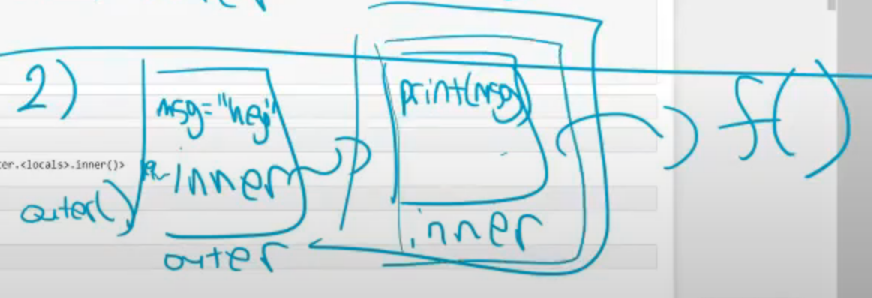

<font color='blue'>Burada önemli olan şey ben outerı execute etmiş olsam da öncesinde bunun içindeki fonksiyon (inner) dışındaki outer scope'undaki variable'ları hatırlıyor.    </font>

In [67]:
def outer(msg):
    msg = msg
    
    def inner():
        print(msg)
        
    return inner

In [68]:
hi_f = outer("hi")

In [69]:
hey_f = outer("hey")

In [70]:
hi_f()

hi


In [71]:
hey_f()

hey


In [84]:
def outer(func):
    
    def inner(*args):
        print(func(*args))
        
    return inner

In [85]:
def add(*args):
    res = 0
    for e in args:
        res += e
    return res

In [99]:
# x - y - z - ....
def sub(*args):
    res = args[0]
    for e in args:
        res -= e
    return res

# Bu istediğimiz sonucu vermeyecek, çünkü for e in args'ın içinde 30 da var. Önce onu çıkaracak.

In [87]:
add_func = outer(add)

In [88]:
sub_func = outer(sub)

In [89]:
add_func(2,3)

5


In [90]:
add_func(2,3,5,6,7)

23


In [91]:
sub_func(30,1,2,3,4)

-10


In [100]:
# x - y - z - ....
def sub(*args):
    res = args[0]
    iter_args = iter(args) # burada 30
    next(iter_args)  # burada 1
    for e in iter_args:  # 1'den başlıyor
        res -= e
    return res

In [101]:
sub_func(30,1,2,3,4)

20


In [94]:
sub_func = outer(sub)

In [95]:
sub_func(30,1,2,3,4)

20


##### <font color='blue'>`add_func = outer(add)` napıyor ona bakıyoruz.</font>

def outer(func):
    
    def inner(*args):
        print(func(*args))
        
    return inner

<font color='blue'>`outer(add)`e bakmak için outer'a gidiyoruz. outer `return inner` dönüyor. inner dediğimiz şey  `print(func(*args))` bastırıyor. 'func' yerine 'add'i yazıyoruz. Bu kadar. `add_func = outer(add)` kodundan `add_func = print(add(*args))` bunu öğrenmiş olduk sadece.</font>

In [96]:
add_func = outer(add)

##### <font color='blue'> add_func(2,3) napıyor ona bakıyoruz.</font>

<font color='blue'>`add_func = print(add(*args))` idi.  `add_func(2,3)` dediğimizde \*args=2,3 olarak yerine yerleştiriyor. `print(add(*args))` yerine `print(add(2,3))` yazıyor. </font>

    def add(*args):
        res = 0
        for e in args:
            res += e
        return res

<font color='blue'>`add(2,3)` fonksiyonunu çalıştıracak args (2,3) şeklinde tuple olarak görüyor, iterate ediyor ve 5 sonucunu dönüyor. </font>

In [98]:
add_func(2,3)

5


### 3) Decorators

<font color='blue'> Bizim bir fonksiyonumuz var diyelim. Biz bu fonksiyonun özelliklerini kullanmak istiyoruz ama bazı özelliklerini modifiye etmek istiyoruz. Bunun için o fonksiyonumuzu sürekli yeniden yazmak yerine ona bir wrapper yazıp o fonksiyonu modifiye eden, ona yeni bir şeyler ekleyen bir şey tanımlayacağız.  </font>

<font color='blue'> Decoratorın işleyişi şu: benim bir decoratorım olacak `decorator_func`, bunun içinde bir fonksiyonum `wrapper_func()` olacak. Benim asıl modifiye etmek istediğim, bir şeyler yapmak istediğim fonksiyon da `func()` bunun içinde işlem yaptırıyor olacak.     </font>

Decorators are functions that takes other function(s) as a parameters and returns new function with new functionality

##### <font color='blue'> Bu örnekte decoder sadece wrapperı döndürüyor. Burada bir fonksiyonalite eklemedik.</font>

In [34]:
def print_func():
    print("hey")

In [35]:
def decorator_func(func):
    def wrapper_func():
        return func()
        
    return wrapper_func

In [36]:
decorated_print = decorator_func(print_func)

In [37]:
decorated_print()

hey


##### <font color='blue'> Burada execute edeceğimiz fonksiyonun adını bastırıyoruz.</font>

Decorating function allow us to easily add new functionality to our existing function. With this, without needed to change our original function we can add new functionality

In [41]:
def decorator_func(func):
    def wrapper_func():
        print(f"the name of the function is {func.__name__}") 
        return func()
        
    return wrapper_func

In [42]:
decorated_print =  decorator_func(print_func)

In [43]:
decorated_print()

the name of the function is print_func
hey


##### <font color='blue'> Aynı şeyi `decorated_print =  decorator_func(print_func)` yapmak yerine `@decorator_func` kullanarak da yapabiliyoruz.</font>

**We can do the same thing by:**

In [50]:
def decorator_func(func):
    def wrapper_func():
        print(f"the name of the function is {func.__name__}") 
        return func()
        
    return wrapper_func

In [51]:
# this is the same as saying print_func = decorator_func(print_func)
# so we are just wrapping our original function !
@decorator_func 
def print_func():
    print("hey")

@func just means we passed our function below to @**func** as a parameter

In [52]:
print_func()

the name of the function is print_func
hey


##### <font color='blue'> `print_func` yerine farklı bir fonksiyon tanımlayalım, nasıl bir çıktı vereceğini görelim.</font>

In [68]:
def dif_func(name, number):
    print(f"Name: {name}, number: {number}")

In [69]:
dif_func("jack", 102)

Name: jack, number: 102


<font color='blue'> Eskiden fonksiyonumun parametresi yoktu. 
    
    def print_func():
        print("hey")
        
Şimdi parametresi var.
    
    def func(name, number):
        print(f"Name: {name}, number: {number}")
</font>

###### <font color='purple'> wrapper foksiyonunu argüman vermeden yazarak `wrapper_func()` :</font>

In [73]:
def decorator_func(func):
    def wrapper_func():
        print(f"the name of the function is {func.__name__}")
        return func(*args)
        
    return wrapper_func

In [74]:
@decorator_func
def dif_func(name, number):
    print(f"Name: {name}, number: {number}")

In [75]:
# it gives arguments to wrapper
dif_func("Jack", 102)

TypeError: wrapper_func() takes 0 positional arguments but 2 were given

<font color='blue'> Hata veriyor. Çünkü parametreli bir fonksiyon olduğu için `wrapper_func` içinde de o parametreleri vereceğimizi belirtmemiz lazım `wrapper_func(*args)` şeklinde. </font>

###### <font color='purple'> wrapper foksiyonunu argüman verip yazarak `wrapper_func(*args)` :</font>

In [76]:
def decorator_func(func):
    def wrapper_func(*args):
        print(f"the name of the function is {func.__name__}")
        return func(*args)
        
    return wrapper_func

In [77]:
@decorator_func
def func(name, number):
    print(f"Name: {name}, number: {number}")

In [78]:
func("Jack", 102)

the name of the function is func
Name: Jack, number: 102


### Class Decorators

In [79]:
class decorator_class:
    
    def __init__(self, func):
        self.func = func
    
    def __call__(self, *args): # wrapper kısmı bu kısım oluyor burada.
        
        print(f"the name of the function is {self.func.__name__}")
        return self.func(*args)

In [80]:
@decorator_class
def func(name, number):
    print(f"Name: {name}, number: {number}")

In [81]:
func("Jack", 102)

the name of the function is func
Name: Jack, number: 102


## Exercises

<font color='blue'> Diyelim ki bir fonksiyonun ne kadar sürede çalıştığına bakmak istiyoruz. </font>

<font color='blue'> Genelde wrapperlarda `wrapper(*args, **kwargs)` kwargs da yazar, başka şeyleri de kabul etsin diye. </font>

In [84]:
import functools
import time

def timer(func):
    
    def wrapper(*args, **kwargs): 
        start = time.perf_counter()    
        value = func(*args, **kwargs)
        end = time.perf_counter()      
        run_time = end - start 
        print(f"Executed '{func.__name__}' in {run_time:.4f} secs")
        return value
    return wrapper

@timer
def wait(num):
    for _ in range(num):
        sum([i**5 for i in range(100000)])

In [85]:
wait(1)

Executed 'wait' in 0.0593 secs


In [86]:
wait(100)

Executed 'wait' in 4.4744 secs


<font color='blue'> `@timer` diye bir fonksiyonum var ve ben onu her fonksiyona uygulayabiliyorum.   </font>

In [87]:
@timer

def f(n):
    res=1
    for i in range(1,n):
        res *=i

In [88]:
f(2000)

Executed 'f' in 0.0029 secs
